In [1]:
# Importing all necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading the data
df=pd.read_csv('solarpowergeneration.csv')
df.head(10)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0


In [3]:
df.shape  ## Shape of the data set

(2920, 10)

In [4]:
## standardizing the column name 
def standardize_col_names(df):
    df = df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_").replace("(", "").replace(")", ""))
    return df

In [5]:
df=standardize_col_names(df)                # Calling the Function

In [6]:
df.info()                                   # Basic info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distance_to_solar_noon     2920 non-null   float64
 1   temperature                2920 non-null   int64  
 2   wind_direction             2920 non-null   int64  
 3   wind_speed                 2920 non-null   float64
 4   sky_cover                  2920 non-null   int64  
 5   visibility                 2920 non-null   float64
 6   humidity                   2920 non-null   int64  
 7   average_wind_speed_period  2919 non-null   float64
 8   average_pressure_period    2920 non-null   float64
 9   power_generated            2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [7]:
## From Here we can see the data types all columns

In [8]:
df.describe()            ## description of data

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [9]:
df["distance_to_solar_noon"] = df["distance_to_solar_noon"] * (180 / np.pi)      # Convert distance_to_solar_noon from radians to degrees
#df["average_pressure_hPa"] = df["average_pressure_period"] * 33.8639  # Convert average_pressure from inHg to hPa and removing Average_Pressure_Period
#df = df.drop(columns=['average_pressure_period'],axis=1)
#df["power_generated"] = df["power_generated"] / (3.6 * 10**6)  # Convert power_generated from Joules to kiloWatt per hour 

In [10]:
df.head(10)

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,49.268479,69,28,7.5,0,10.0,75,8.0,29.82,0
1,36.012386,69,28,7.5,0,10.0,77,5.0,29.85,0
2,22.756293,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,9.500200,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,3.755893,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,17.011986,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,30.268079,69,28,7.5,0,10.0,36,15.0,29.83,515
7,43.524172,69,28,7.5,0,10.0,49,6.0,29.86,0
8,49.395459,72,29,6.8,0,10.0,67,6.0,29.86,0
9,36.105201,72,29,6.8,0,10.0,49,0.0,29.87,0


## Checking for Null values

In [11]:
df.isnull().sum()

distance_to_solar_noon       0
temperature                  0
wind_direction               0
wind_speed                   0
sky_cover                    0
visibility                   0
humidity                     0
average_wind_speed_period    1
average_pressure_period      0
power_generated              0
dtype: int64

In [12]:
## Having only one null values in average_wind_speed_period

In [13]:
df['average_wind_speed_period'].describe() 

count    2919.000000
mean       10.129154
std         7.261547
min         0.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        40.000000
Name: average_wind_speed_period, dtype: float64

In [14]:
## Filling with mean will be better
df['average_wind_speed_period']=df['average_wind_speed_period'].fillna(df['average_wind_speed_period'].mean())

In [15]:
df.isnull().sum()

distance_to_solar_noon       0
temperature                  0
wind_direction               0
wind_speed                   0
sky_cover                    0
visibility                   0
humidity                     0
average_wind_speed_period    0
average_pressure_period      0
power_generated              0
dtype: int64

## Checking For Duplicates

In [16]:
df[df.duplicated()]

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated


In [17]:
## There is No duplicates in the data

## Checking For Outliers

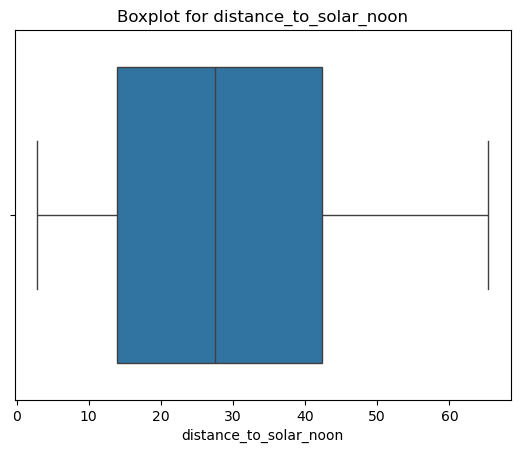

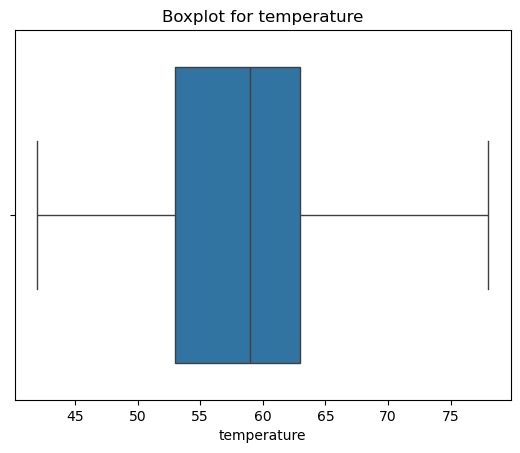

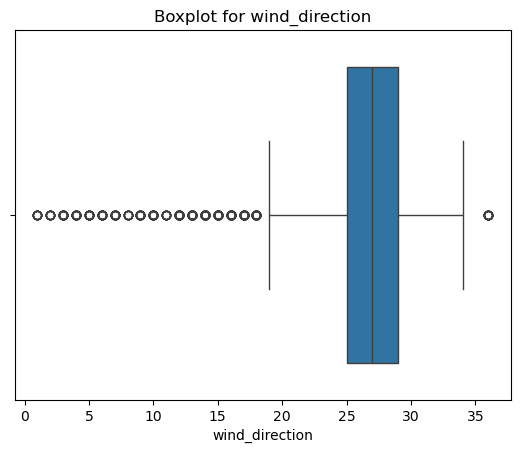

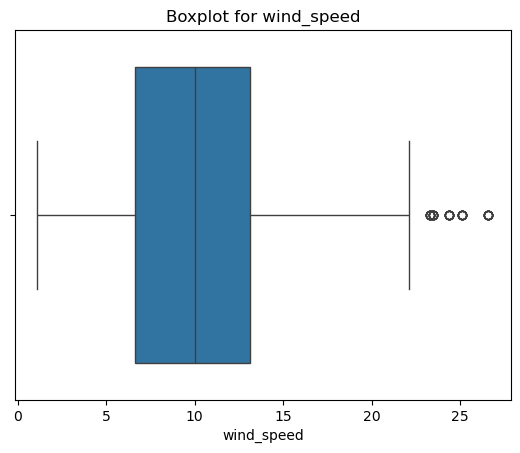

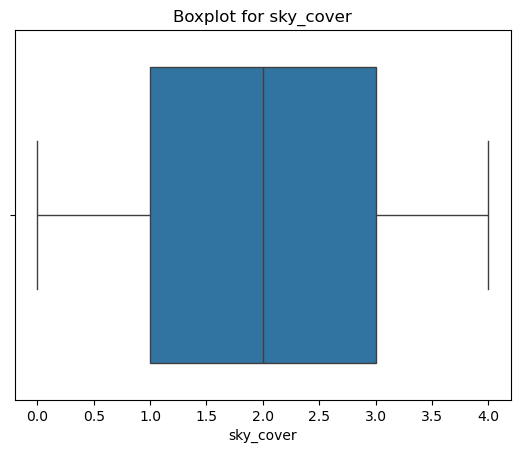

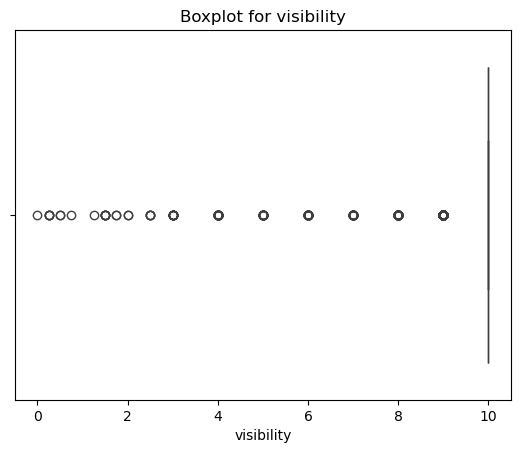

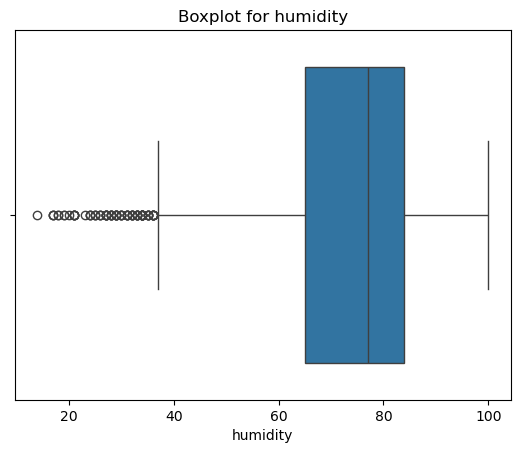

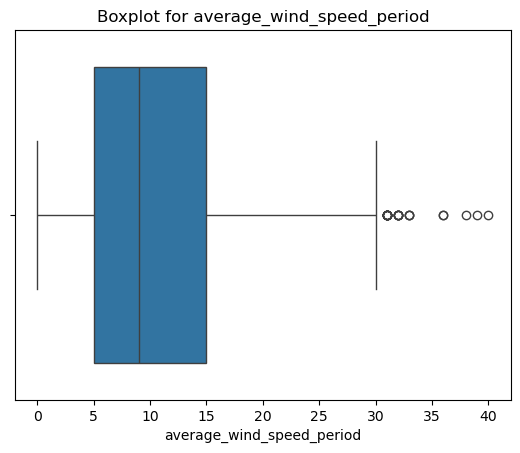

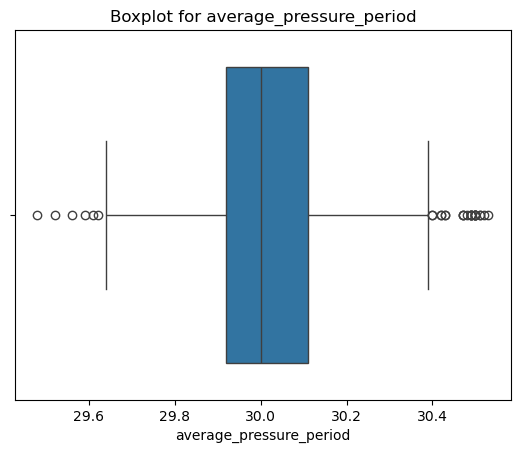

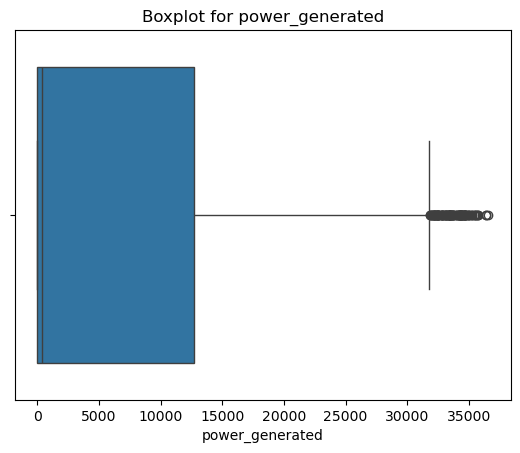

In [18]:
## Visualizations for checking the outliers
for i in df.columns:
    #plt.figure(figsize=(8, 4))  # Optional: set the figure size
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')  # Add a title for each plot
    plt.show()  # Display the plot


In [19]:
## outliers detection using inter Quantile Range
q1=df.quantile(0)
q3=df.quantile(0.75)
iqr=q3-q1
lw=q1 - 1.5 * iqr
up= q3 + 1.5 * iqr

In [20]:
outlier_records = pd.DataFrame() 
for i in range(len(df.columns)):
    outliers = df[(df[df.columns[i]] < lw[i]) | (df[df.columns[i]] > up[i])]
    outlier_records = pd.concat([outlier_records, outliers])


In [21]:
outlier_records

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
1709,17.090857,54,27,25.1,2,10.0,64,38.0,29.89,18575
1804,3.630911,50,29,26.6,1,10.0,49,40.0,29.94,36580
1805,16.702192,50,29,26.6,2,10.0,61,39.0,29.91,7428
1508,3.274045,52,26,13.4,1,10.0,59,17.0,30.01,31911
1516,3.260073,49,29,13.2,1,10.0,45,15.0,30.12,32890
...,...,...,...,...,...,...,...,...,...,...
2844,3.433455,63,29,14.7,2,10.0,63,21.0,29.86,32668
2852,3.442049,62,28,11.6,2,10.0,57,24.0,29.92,34720
2860,3.450687,61,27,8.1,1,10.0,59,18.0,29.95,32841
2868,3.459368,63,29,9.8,1,10.0,66,6.0,29.96,32513


In [22]:
## checking the number the rows
outlier_records.shape

(110, 10)

## Removal of outliers 

In [23]:
## dropping the row numbers in outliers list
df.drop(axis=0,index=outlier_records.index,inplace=True)

In [24]:
## Again the checking for the outliers 
outlier_records_1 = pd.DataFrame() 
for i in range(len(df.columns)):
    outliers = df[(df[df.columns[i]] < lw[i]) | (df[df.columns[i]] > up[i])]
    outlier_records_1 = pd.concat([outlier_records_1, outliers])


In [25]:
outlier_records_1

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated


## Correlational analysis


In [26]:
cor_mat=df.corr()
cor_mat

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
distance_to_solar_noon,1.000000,-0.139149,-0.097524,-0.108639,-0.047499,0.087385,0.323973,-0.162266,0.070717,-0.726325
temperature,-0.139149,1.000000,0.342322,0.104509,-0.228715,0.194360,-0.217293,0.053687,-0.431532,0.127964
wind_direction,-0.097524,0.342322,1.000000,0.340365,-0.129229,0.199719,-0.077133,0.221704,-0.270020,0.120571
wind_speed,-0.108639,0.104509,0.340365,1.000000,0.124242,0.180506,0.038917,0.657860,-0.390565,0.079628
sky_cover,-0.047499,-0.228715,-0.129229,0.124242,1.000000,-0.220576,0.383153,0.067189,-0.100214,-0.159671
visibility,0.087385,0.194360,0.199719,0.180506,-0.220576,1.000000,-0.287988,0.135299,-0.104041,0.053710
humidity,0.323973,-0.217293,-0.077133,0.038917,0.383153,-0.287988,1.000000,-0.183956,0.007070,-0.482634
average_wind_speed_period,-0.162266,0.053687,0.221704,0.657860,0.067189,0.135299,-0.183956,1.000000,-0.296598,0.198341
average_pressure_period,0.070717,-0.431532,-0.270020,-0.390565,-0.100214,-0.104041,0.007070,-0.296598,1.000000,-0.011920
power_generated,-0.726325,0.127964,0.120571,0.079628,-0.159671,0.053710,-0.482634,0.198341,-0.011920,1.000000


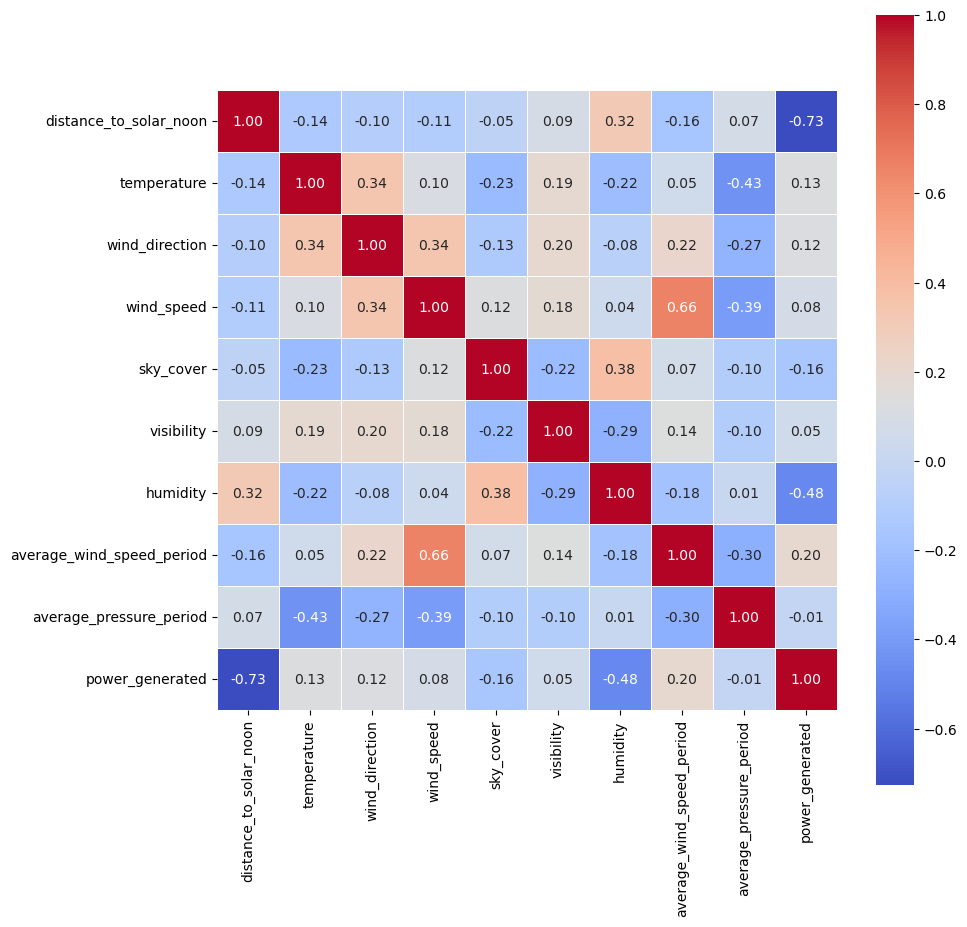

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data=cor_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

## Visualizations

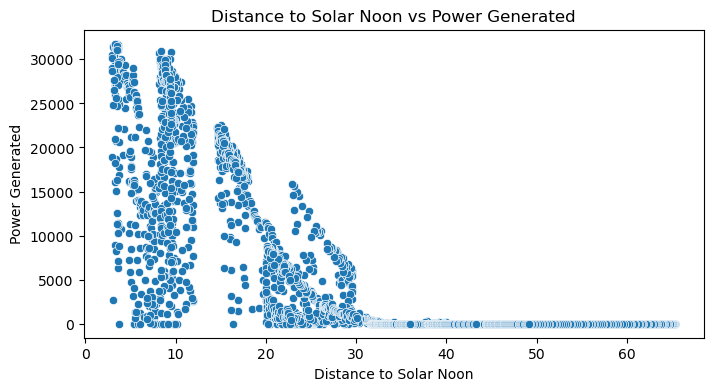

In [28]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='distance_to_solar_noon', y='power_generated', data=df)
plt.title('Distance to Solar Noon vs Power Generated')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated')
plt.show()

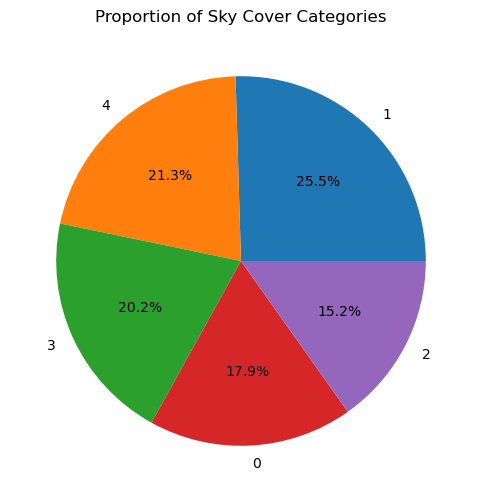

In [29]:
df['sky_cover'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Proportion of Sky Cover Categories')
plt.ylabel('')
plt.show()

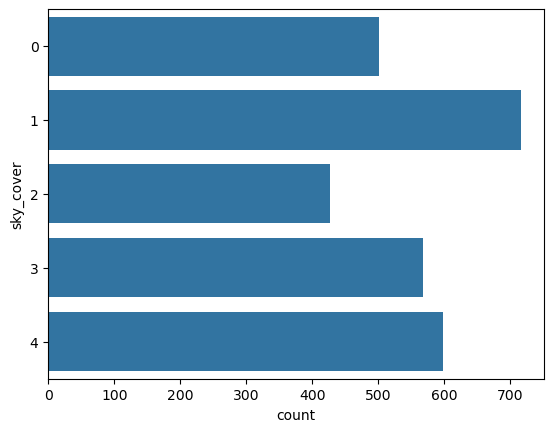

In [30]:
## Sky cover is the categorical variable
sns.countplot(data=df,y='sky_cover')
plt.show()

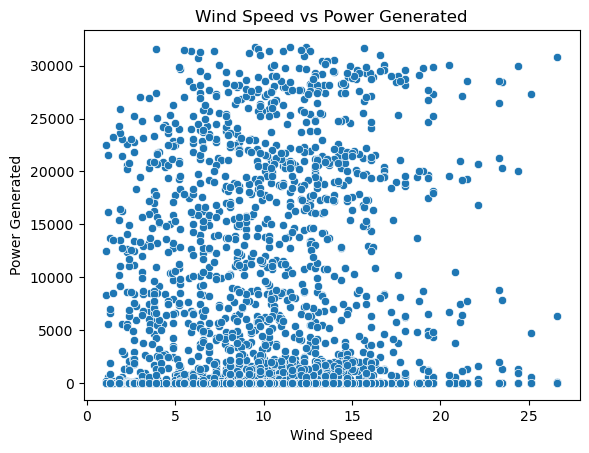

In [31]:
## relatonship between wind speed vs power_generated
sns.scatterplot(x=df['wind_speed'], y=df['power_generated'])
plt.title('Wind Speed vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated')
plt.show()

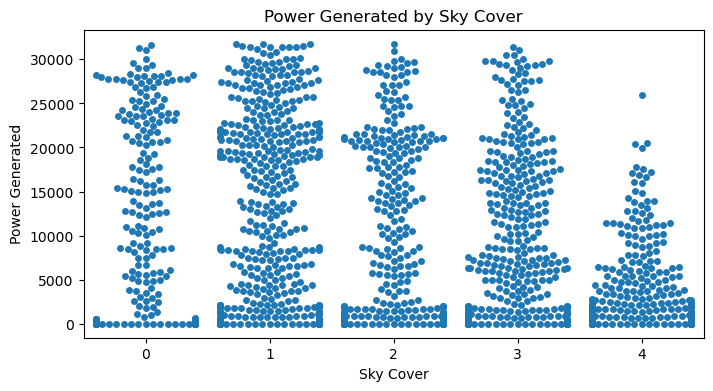

In [32]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x='sky_cover', y='power_generated', data=df)
plt.title('Power Generated by Sky Cover')
plt.xlabel('Sky Cover')
plt.ylabel('Power Generated')
plt.show()

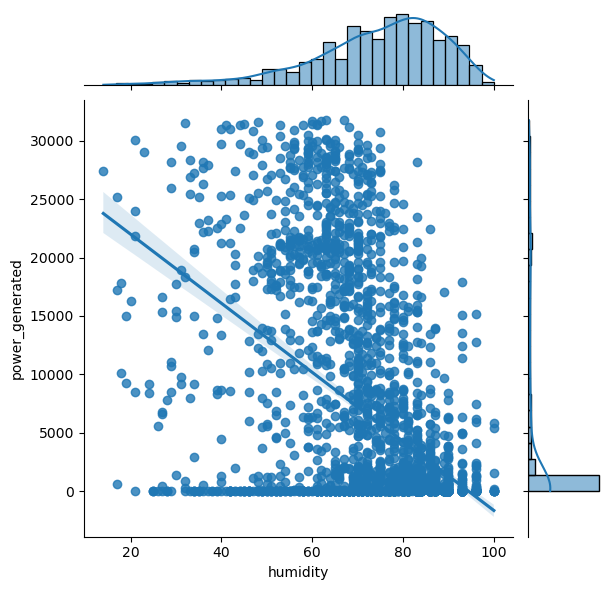

In [33]:
sns.jointplot(x='humidity', y='power_generated', data=df, kind='reg')
plt.show()

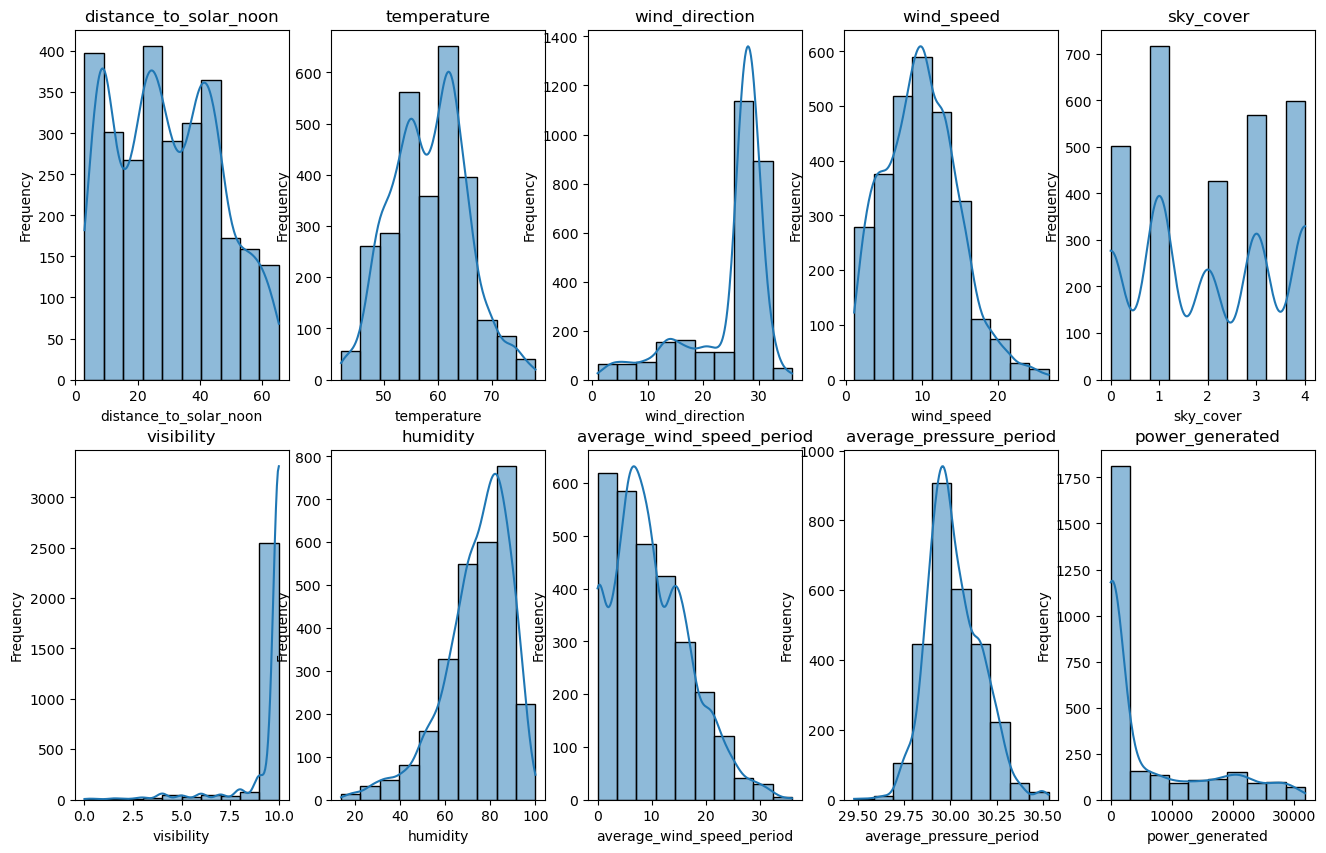

In [34]:
## Comparative the of frequency of the all columns
fig,axs=plt.subplots(2, 5, figsize=(16, 10))
ct=0
for i in range(2):
    for j in range(5):
        sns.histplot(df[df.columns[ct]], bins=10, kde=True,ax=axs[i,j])
        axs[i, j].set_title(f'{df.columns[ct]}')
        axs[i, j].set_xlabel(f'{df.columns[ct]}')
        axs[i, j].set_ylabel('Frequency')
        ct+=1
plt.show()

In [35]:
## Distribution of all Columns

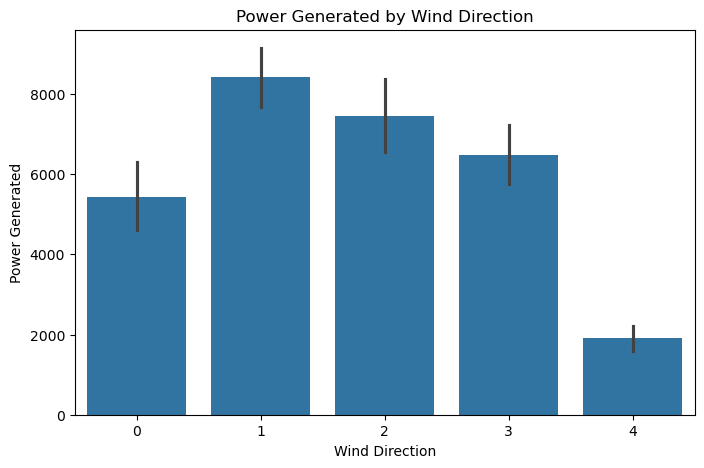

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sky_cover', y='power_generated', data=df)
plt.title('Power Generated by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Power Generated')
plt.show()

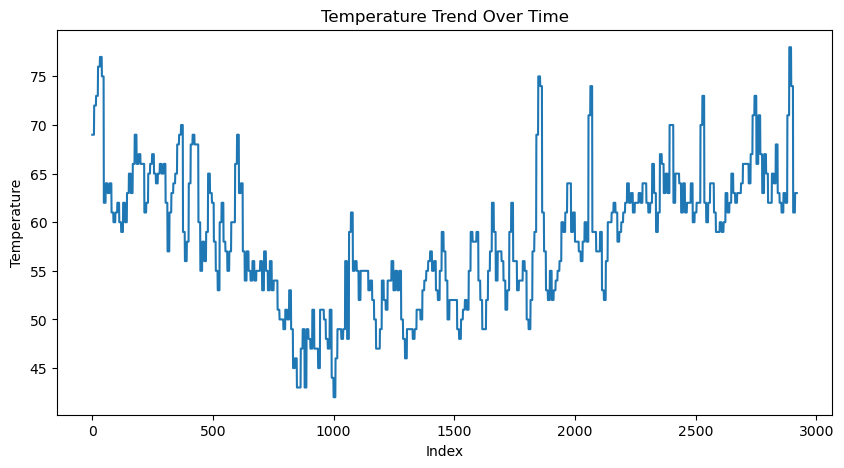

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y='temperature', data=df)
plt.title('Temperature Trend Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()

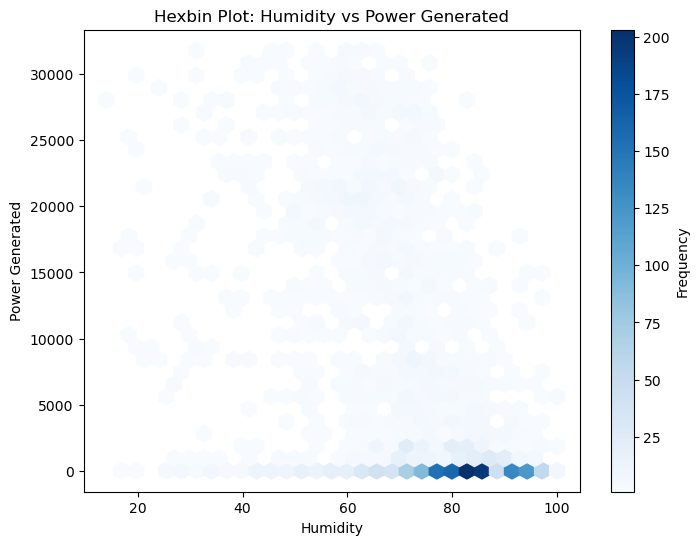

In [38]:
plt.figure(figsize=(8, 6))
plt.hexbin(df['humidity'], df['power_generated'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot: Humidity vs Power Generated')
plt.xlabel('Humidity')
plt.ylabel('Power Generated')
plt.show()

In [39]:
import numpy as np
df['average_wind_speed_period_log'] = np.log1p(df['average_wind_speed_period'])  # log(x+1) to avoid log(0)

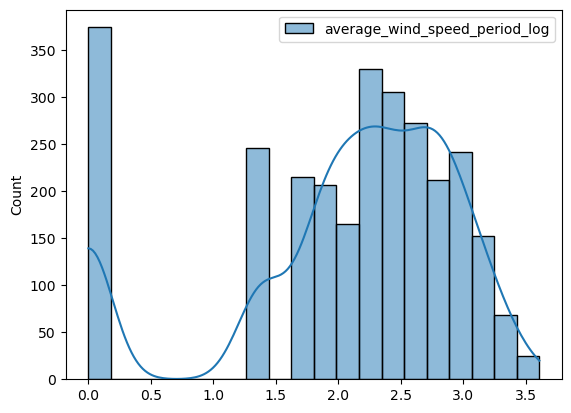

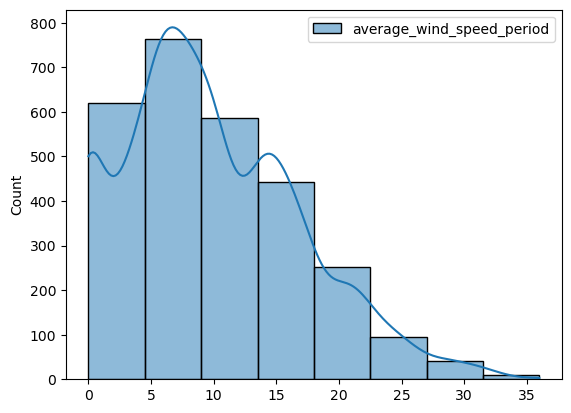

In [40]:
sns.histplot(df[['average_wind_speed_period_log']], bins=20, kde=True)
plt.show()
sns.histplot(df[['average_wind_speed_period']], bins=8, kde=True)
plt.show()

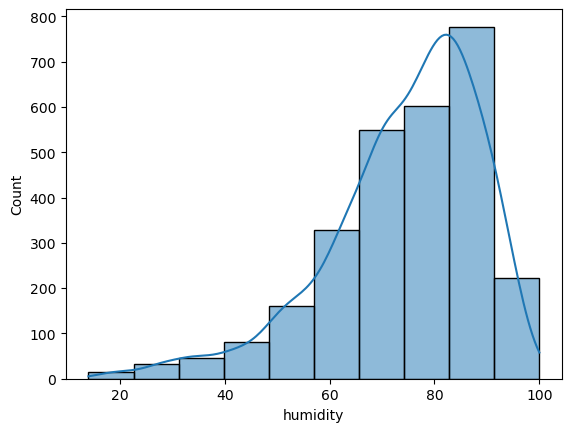

In [41]:
sns.histplot(df['humidity'], bins=10, kde=True)
plt.show()

In [42]:
df1= np.sqrt(df['humidity'])

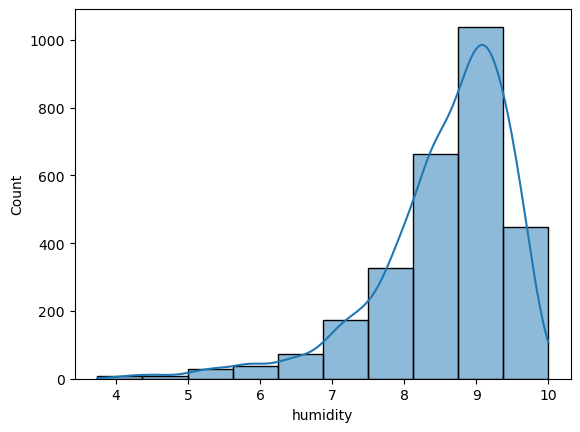

In [43]:
sns.histplot(df1, bins=10, kde=True)
plt.show()

In [44]:
df['humidity']



0       75
1       77
2       70
3       33
4       21
        ..
2915    75
2916    66
2917    68
2918    81
2919    81
Name: humidity, Length: 2811, dtype: int64

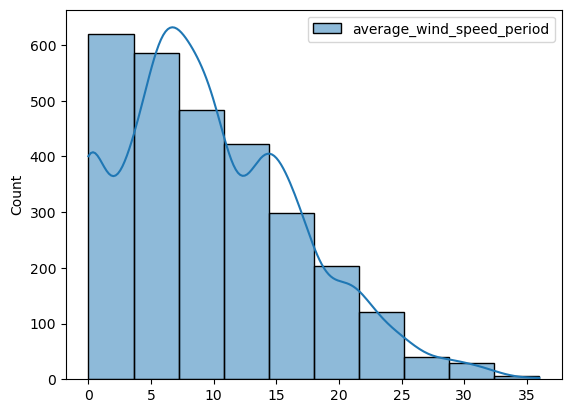

In [45]:
sns.histplot(df[['average_wind_speed_period']], bins=10, kde=True)
plt.show()

## Feature Engineering

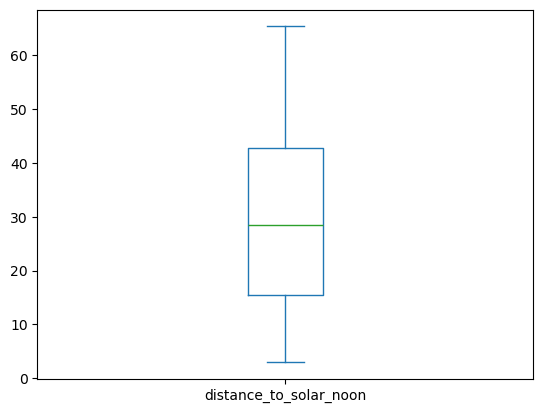

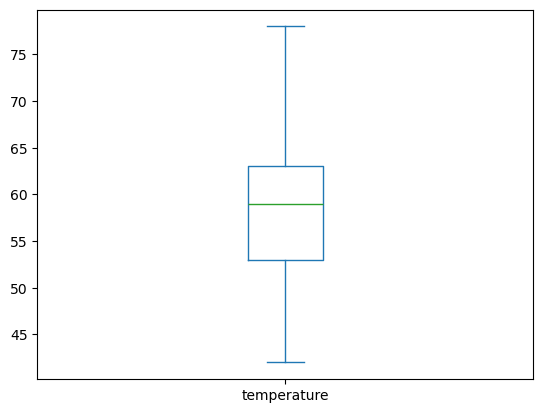

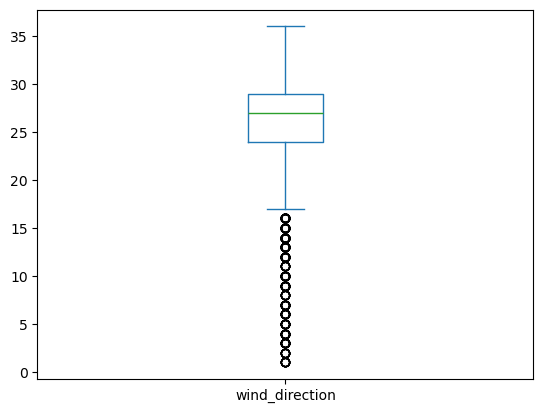

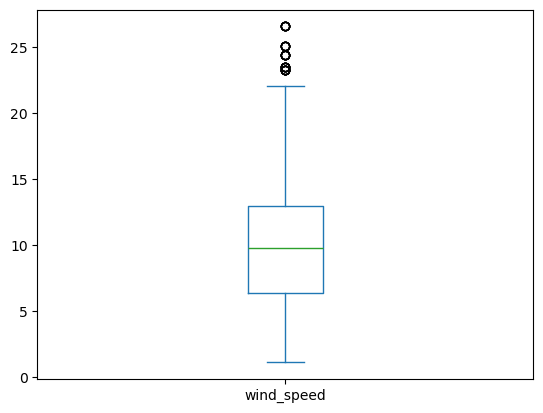

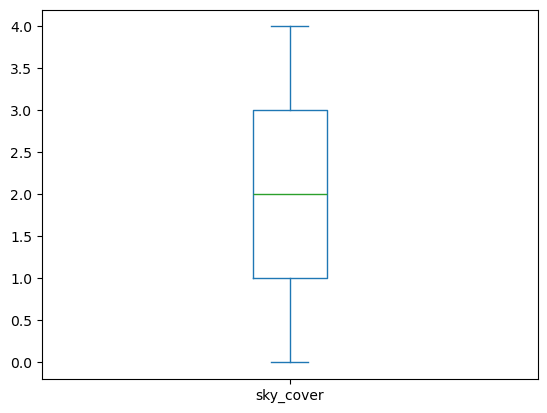

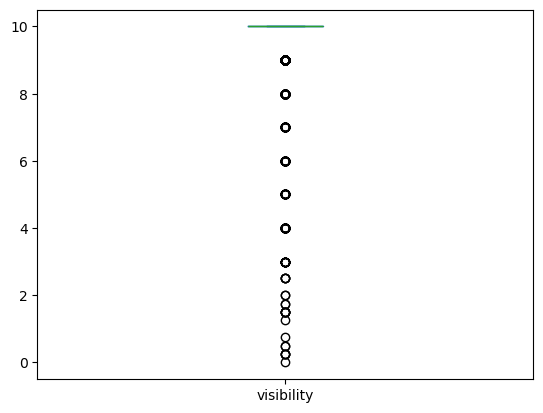

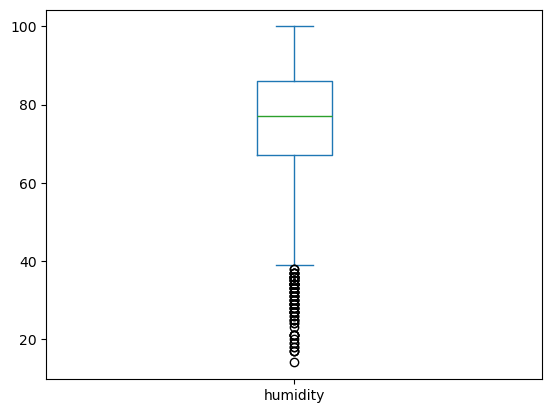

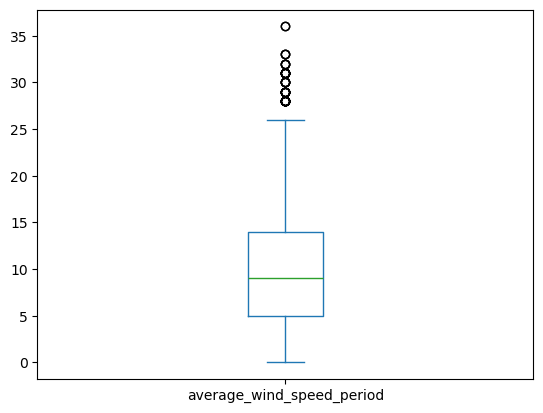

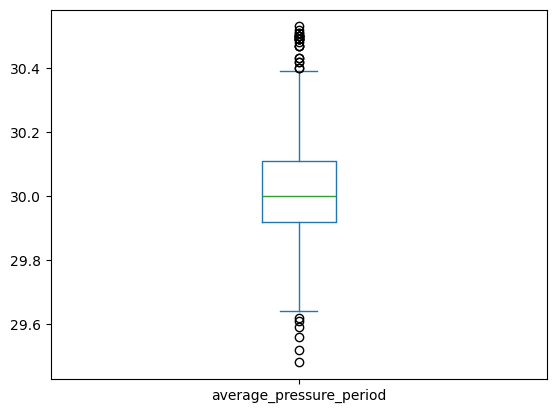

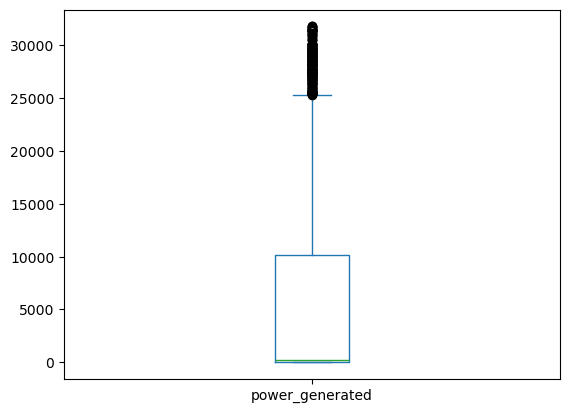

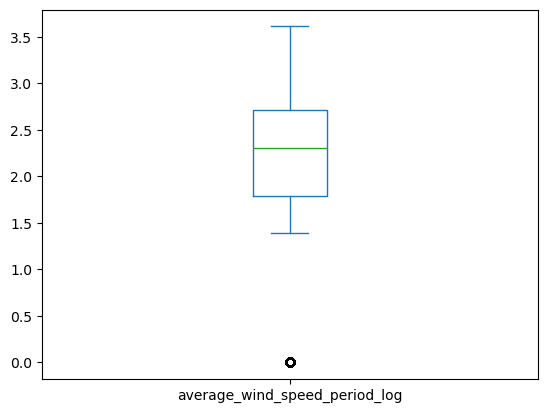

In [46]:
for i in df.columns:
    df[i].plot(kind='box')
    plt.show()

In [47]:
count=len(df.columns)
print(count)

11


In [48]:
df.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated',
       'average_wind_speed_period_log'],
      dtype='object')

In [49]:
df.drop(columns='average_wind_speed_period_log',inplace=True)

In [50]:
df['wind_direction'].unique()

array([28, 29, 30, 31, 21, 24, 26, 27, 19, 32, 14, 16, 15, 23, 20, 10,  5,
        9, 17, 36, 34, 12,  7, 33,  6,  3, 13, 25,  4,  1, 11,  8,  2, 22,
       18], dtype=int64)

In [51]:
features = df.iloc[:,:-1]

In [52]:
target = df.iloc[:,-1]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2811 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   distance_to_solar_noon     2811 non-null   float64
 1   temperature                2811 non-null   int64  
 2   wind_direction             2811 non-null   int64  
 3   wind_speed                 2811 non-null   float64
 4   sky_cover                  2811 non-null   int64  
 5   visibility                 2811 non-null   float64
 6   humidity                   2811 non-null   int64  
 7   average_wind_speed_period  2811 non-null   float64
 8   average_pressure_period    2811 non-null   float64
 9   power_generated            2811 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 241.6 KB


In [54]:
df.head()

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,49.268479,69,28,7.5,0,10.0,75,8.0,29.82,0
1,36.012386,69,28,7.5,0,10.0,77,5.0,29.85,0
2,22.756293,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,9.500200,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,3.755893,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [55]:
features

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period
0,49.268479,69,28,7.5,0,10.0,75,8.0,29.82
1,36.012386,69,28,7.5,0,10.0,77,5.0,29.85
2,22.756293,69,28,7.5,0,10.0,70,0.0,29.89
3,9.500200,69,28,7.5,0,10.0,33,0.0,29.91
4,3.755893,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,9.537070,63,27,13.9,4,10.0,75,10.0,29.93
2916,3.668104,63,27,13.9,1,10.0,66,15.0,29.91
2917,16.873277,63,27,13.9,2,10.0,68,21.0,29.88
2918,30.078450,63,27,13.9,2,10.0,81,17.0,29.87


In [56]:
target

0           0
1           0
2        5418
3       25477
4       30069
        ...  
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: power_generated, Length: 2811, dtype: int64

## Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
scaler_features=scaler.fit_transform(features)

In [60]:
scaler_features = pd.DataFrame(scaler_features,columns=features.columns)

In [83]:
scaler_features

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period
0,1.168960,1.538811,0.451112,-0.510608,-1.417573,0.325944,0.051874,-0.253781,-1.393819
1,0.372310,1.538811,0.451112,-0.510608,-1.417573,0.325944,0.187205,-0.677810,-1.183989
2,-0.424340,1.538811,0.451112,-0.510608,-1.417573,0.325944,-0.286452,-1.384526,-0.904215
3,-1.220990,1.538811,0.451112,-0.510608,-1.417573,0.325944,-2.790071,-1.384526,-0.764328
4,-1.566205,1.538811,0.451112,-0.510608,-1.417573,0.325944,-3.602055,-0.960497,-0.904215
...,...,...,...,...,...,...,...,...,...
2806,-1.218774,0.667066,0.308536,0.824107,1.395556,0.325944,0.051874,0.028906,-0.624441
2807,-1.571481,0.667066,0.308536,0.824107,-0.714291,0.325944,-0.557114,0.735622,-0.764328
2808,-0.777891,0.667066,0.308536,0.824107,-0.011008,0.325944,-0.421783,1.583681,-0.974158
2809,0.015699,0.667066,0.308536,0.824107,-0.011008,0.325944,0.457867,1.018308,-1.044102


## importing the models

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

## Model Building

In [62]:
x_train,x_test,y_train,y_test = train_test_split(scaler_features,target,test_size=0.25,random_state=52)

In [63]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred=lr.predict(x_test)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [65]:
print('R2_score=',score)
print('mean_squared_error',mse)
print('mean_absolute_error=',mae)

R2_score= 0.6290274201716242
mean_squared_error 27968509.612543397
mean_absolute_error= 4200.060235594332


In [66]:
dec = DecisionTreeRegressor(random_state=52)
dec.fit(x_train,y_train)

DecisionTreeRegressor(random_state=52)

In [67]:
y_pred=dec.predict(x_test)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [68]:
print('R2_score=',score)
print('mean_squared_error',mse)
print('mean_absolute_error=',mae)

R2_score= 0.7669787988804052
mean_squared_error 17568025.39544808
mean_absolute_error= 1783.0625889046942


In [69]:
bag = BaggingRegressor( n_estimators=10,random_state=50)
bag.fit(x_train,y_train)

BaggingRegressor(random_state=50)

In [70]:
y_pred=bag.predict(x_test)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('R2_score=',score)
print('mean_squared_error',mse)
print('mean_absolute_error=',mae)


R2_score= 0.8835529386080789
mean_squared_error 8779222.327965861
mean_absolute_error= 1424.403413940256


In [71]:
grad = GradientBoostingRegressor(n_estimators=100,random_state=60)
grad.fit(x_train,y_train)

GradientBoostingRegressor(random_state=60)

In [72]:
y_pred=grad.predict(x_test)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('R2_score=',score)
print('mean_squared_error',mse)
print('mean_absolute_error=',mae)


R2_score= 0.8957859612011987
mean_squared_error 7856945.511322395
mean_absolute_error= 1486.9442196058483


In [73]:
random = RandomForestRegressor(n_estimators=100,random_state=50)
random.fit(x_train,y_train)

RandomForestRegressor(random_state=50)

In [74]:
y_pred=random.predict(x_test)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('R2_score=',score)
print('mean_squared_error',mse)
print('mean_absolute_error=',mae)


R2_score= 0.8999325366639542
mean_squared_error 7544325.274692318
mean_absolute_error= 1343.2509957325747


In [75]:
svr = SVR(C=1.2,kernel='linear',gamma=0.1)
svr.fit(x_train,y_train)

SVR(C=1.2, gamma=0.1, kernel='linear')

In [76]:
y_pred=svr.predict(x_test)
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('R2_score=',score)
print('mean_squared_error',mse)
print('mean_absolute_error=',mae)


R2_score= -0.0008509987150759901
mean_squared_error 75456549.35261369
mean_absolute_error= 4868.720003735168


In [77]:
import warnings
warnings.filterwarnings('ignore')

## Model Evaluation

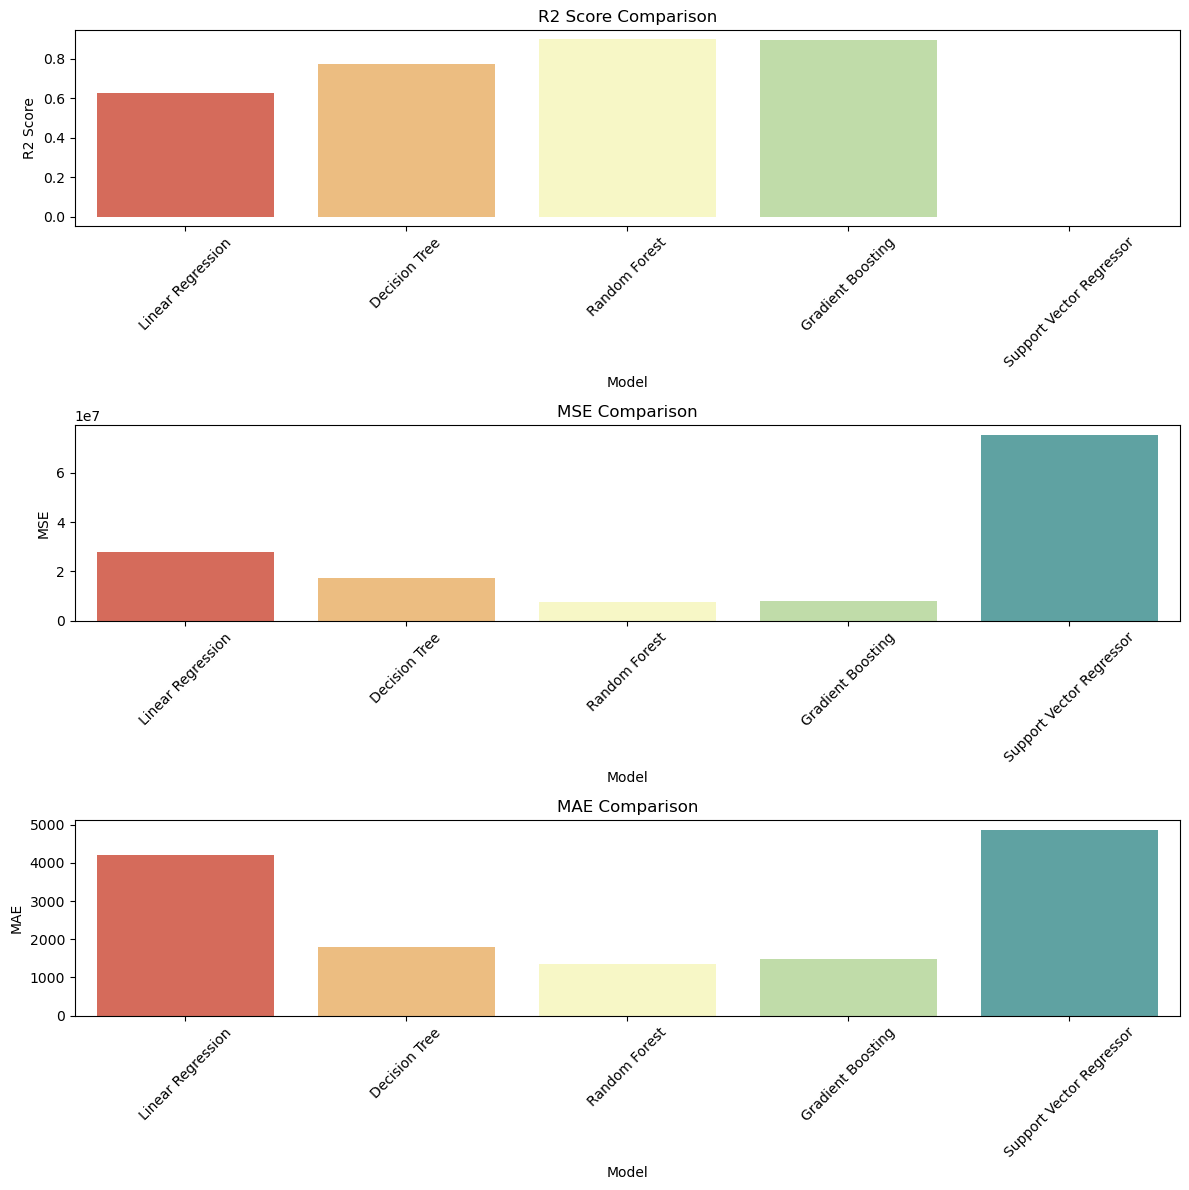

In [78]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(random_state=50),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=50),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=50),
    "Support Vector Regressor": SVR(C=1.2,kernel='linear',gamma=0.1)
}

results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({"Model": name, "R2 Score": r2, "MSE": mse, "MAE": mae})

# Convert results into DataFrame
df_results = pd.DataFrame(results)

# Plot performance metrics
plt.figure(figsize=(12, 12))  # Adjust the height for vertical plots
metrics = ["R2 Score", "MSE", "MAE"]

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)  # Change to 3 rows, 1 column for vertical stacking
    sns.barplot(data=df_results, x="Model", y=metric, palette="Spectral")
    plt.title(f"{metric} Comparison")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=45)  # Rotate model names for better readability

plt.tight_layout()
plt.show()


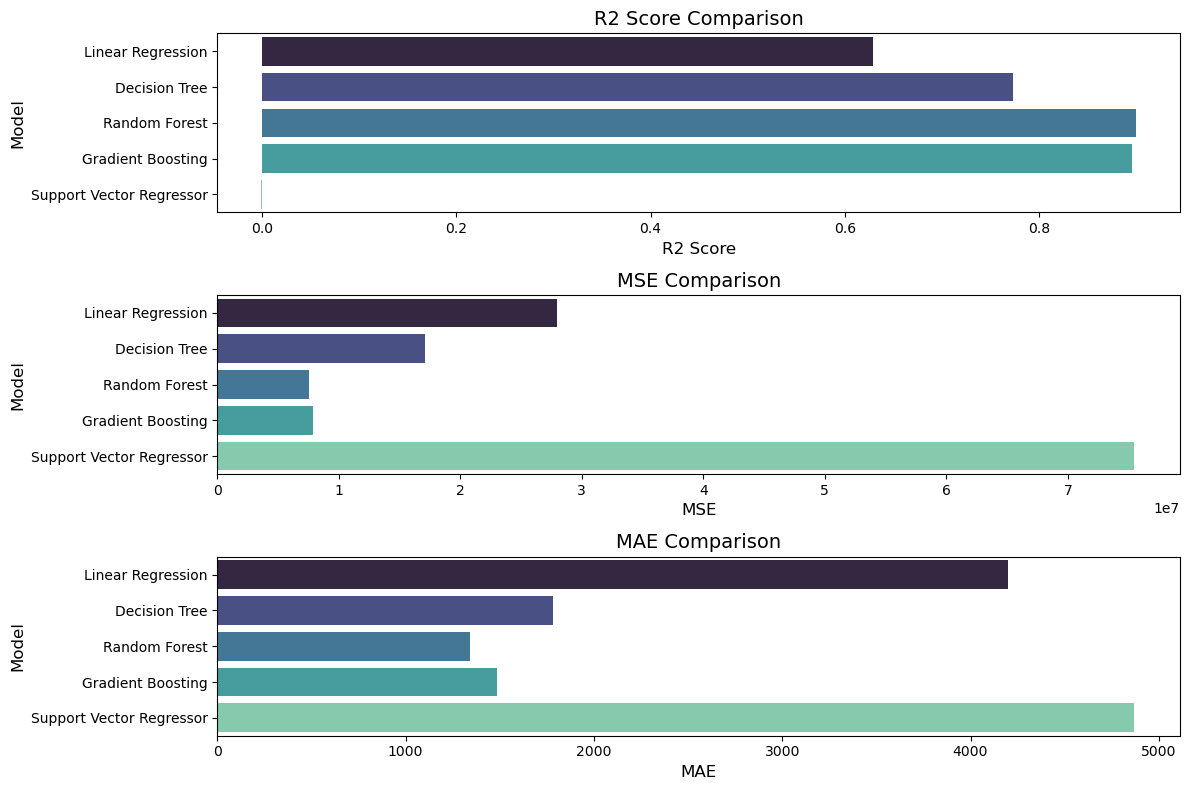

In [79]:
plt.figure(figsize=(12, 8))
metrics = ["R2 Score", "MSE", "MAE"]

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    sns.barplot(data=df_results, y="Model", x=metric, palette="mako")
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel("Model", fontsize=12)

plt.tight_layout()
plt.show()

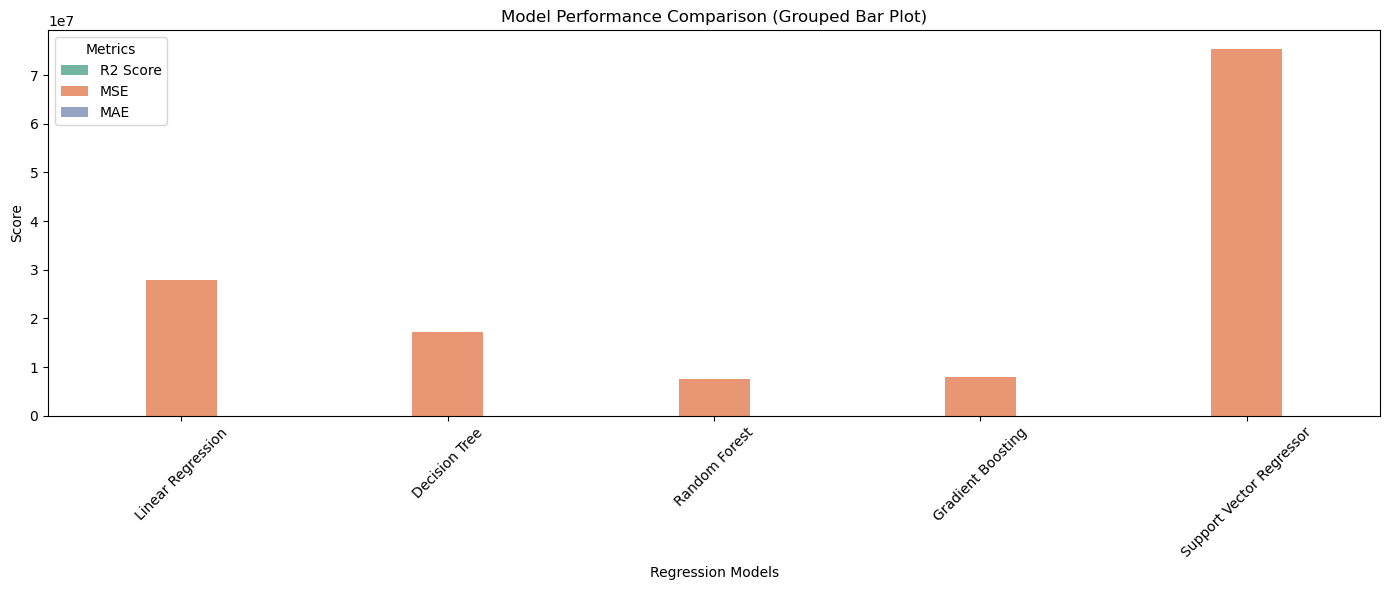

In [80]:
# Melt the DataFrame for grouped bar plot
melted_results = df_results.melt(id_vars=["Model"], value_vars=["R2 Score", "MSE", "MAE"],
                                 var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 6))
sns.barplot(data=melted_results, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Model Performance Comparison (Grouped Bar Plot)")
plt.xlabel("Regression Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

In [81]:
import pickle

In [82]:
pickle.dump(random, open('solar_power_model.pkl', 'wb'))